# EDA: Borussia Dortmund Example - Home Goals
- Sanity-Checking


**Relevant Minimum Data**


Non-negotiables variables to start modeling the hypothesis.


In [1]:
import pandas as pd
from pathlib import Path

# Build an environment-agnostic path to the data file (relative to the project root)
project_root = Path().resolve()
data_path = project_root / "Data" / "2025:2026.csv"

df = pd.read_csv(data_path)

# Filter for Borussia Dortmund as either HomeTeam or AwayTeam
dortmund_df = df[(df['HomeTeam'] == 'Dortmund') | (df['AwayTeam'] == 'Dortmund')]

# Select and display the specified columns
display(dortmund_df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']].head())


,Date,HomeTeam,AwayTeam,FTHG,FTAG
6,23/08/2025,St Pauli,Dortmund,3,3
16,31/08/2025,Dortmund,Union Berlin,3,0
20,13/09/2025,Heidenheim,Dortmund,0,2
35,21/09/2025,Dortmund,Wolfsburg,1,0
38,27/09/2025,Mainz,Dortmund,0,2


**Sanity Check**
1. Are the numbers for goals realistic?
2. Do home/away roles flip correctly?
3. Does Dortmund look different home vs away?


**Distribution Visualizations**


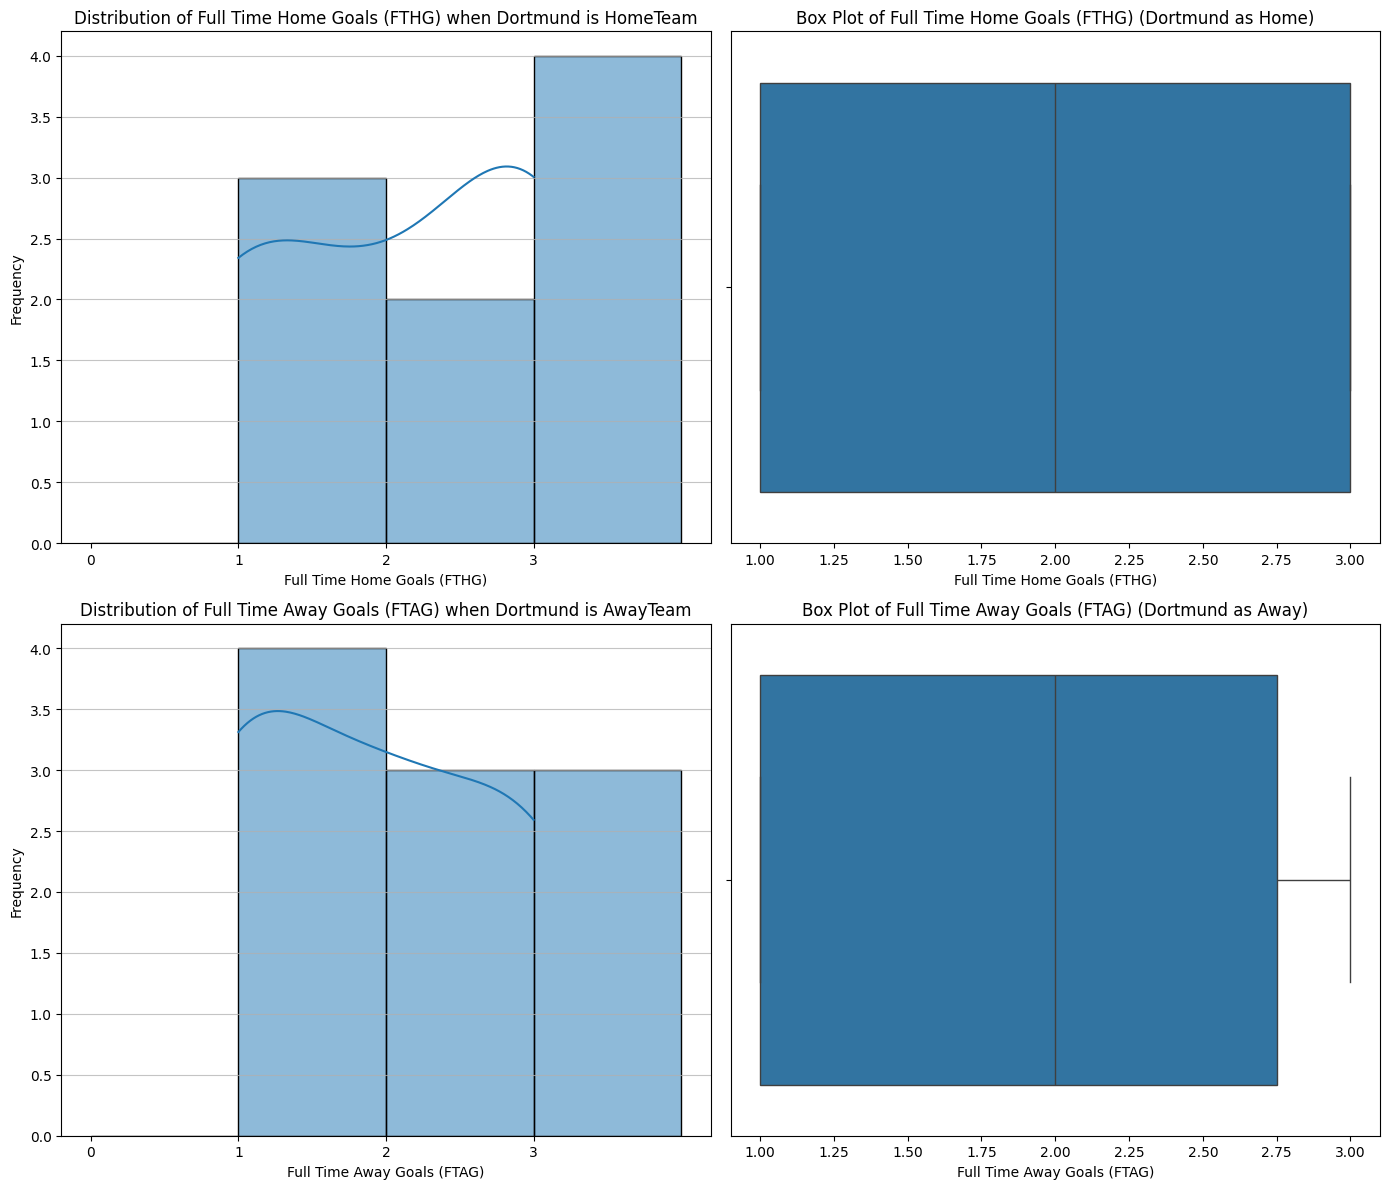

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Dortmund as HomeTeam and AwayTeam
dortmund_home_df = dortmund_df[dortmund_df['HomeTeam'] == 'Dortmund']
dortmund_away_df = dortmund_df[dortmund_df['AwayTeam'] == 'Dortmund']

# Set up two rows of plots: 
# First row = Dortmund as Home (FTHG), Second row = Dortmund as Away (FTAG)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# --- Dortmund as HomeTeam ---
# Histogram for FTHG
sns.histplot(
    dortmund_home_df['FTHG'].dropna(), 
    kde=True,
    bins=range(0, int(dortmund_home_df['FTHG'].max()) + 2),
    ax=axes[0, 0]
)
axes[0, 0].set_title('Distribution of Full Time Home Goals (FTHG) when Dortmund is HomeTeam')
axes[0, 0].set_xlabel('Full Time Home Goals (FTHG)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xticks(range(0, int(dortmund_home_df['FTHG'].max()) + 1))
axes[0, 0].grid(axis='y', alpha=0.75)

# Box plot for FTHG
sns.boxplot(x=dortmund_home_df['FTHG'].dropna(), ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Full Time Home Goals (FTHG) (Dortmund as Home)')
axes[0, 1].set_xlabel('Full Time Home Goals (FTHG)')

# --- Dortmund as AwayTeam ---
# Histogram for FTAG (Away Goals)
sns.histplot(
    dortmund_away_df['FTAG'].dropna(), 
    kde=True,
    bins=range(0, int(dortmund_away_df['FTAG'].max()) + 2),
    ax=axes[1, 0]
)
axes[1, 0].set_title('Distribution of Full Time Away Goals (FTAG) when Dortmund is AwayTeam')
axes[1, 0].set_xlabel('Full Time Away Goals (FTAG)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xticks(range(0, int(dortmund_away_df['FTAG'].max()) + 1))
axes[1, 0].grid(axis='y', alpha=0.75)

# Box plot for FTAG
sns.boxplot(x=dortmund_away_df['FTAG'].dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Full Time Away Goals (FTAG) (Dortmund as Away)')
axes[1, 1].set_xlabel('Full Time Away Goals (FTAG)')

plt.tight_layout()
plt.show()


- Goals are in a believable range (0–5+).
- There are limited anomalies.
- Home/away split behaves plausibly


# Preparing the Core Modeling Sample for Training


## Importing

- Importing the datasets "2023:2024.csv" and "2024:2025.csv", adding a "Season" column to each with its respective value.


**2023/2024**


In [3]:
from pathlib import Path

data_path_2023_2024 = project_root / "Data" / "2023:2024.csv"

df_2023_2024 = pd.read_csv(data_path_2023_2024)
df_2023_2024['Season'] = '2023:2024'
print("DataFrame 'df_2023_2024' loaded and 'Season' column added. Displaying head:")
display(df_2023_2024.head())


DataFrame 'df_2023_2024' loaded and 'Season' column added. Displaying head:


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season
0,D1,18/08/2023,19:30,Werder Bremen,Bayern Munich,0,4,A,0,1,...,1.75,1.85,2.08,1.88,2.03,1.92,2.09,1.85,2.00,2023:2024
1,D1,19/08/2023,14:30,Augsburg,M'gladbach,4,4,D,3,3,...,0.25,1.82,2.11,1.83,2.11,1.83,2.18,1.77,2.09,2023:2024
2,D1,19/08/2023,14:30,Hoffenheim,Freiburg,1,2,A,0,2,...,-0.25,1.91,2.02,1.92,2.01,1.98,2.02,1.91,1.95,2023:2024
3,D1,19/08/2023,14:30,Leverkusen,RB Leipzig,3,2,H,2,1,...,-0.25,2.11,1.82,2.14,1.84,2.14,1.84,2.09,1.78,2023:2024
4,D1,19/08/2023,14:30,Stuttgart,Bochum,5,0,H,2,0,...,-0.75,1.98,1.95,1.99,1.93,2.06,1.96,1.95,1.89,2023:2024


**2024/2025**


In [4]:
data_path_2024_2025 = project_root / "Data" / "2024:2025.csv"

df_2024_2025 = pd.read_csv(data_path_2024_2025)
df_2024_2025['Season'] = '2024:2025'
print("DataFrame 'df_2024_2025' loaded and 'Season' column added. Displaying head:")
display(df_2024_2025.head())


DataFrame 'df_2024_2025' loaded and 'Season' column added. Displaying head:


/var/folders/3l/3r33nlzx08x33ms97984bk_m0000gn/T/ipykernel_72669/3772373988.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2024_2025['Season'] = '2024:2025'


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA,Season
0,D1,23/08/2024,19:30,M'gladbach,Leverkusen,2,3,A,0.0,2.0,...,2.04,1.87,2.06,1.96,2.08,1.91,1.96,1.91,2.07,2024:2025
1,D1,24/08/2024,14:30,Augsburg,Werder Bremen,2,2,D,2.0,1.0,...,2.05,1.88,2.04,1.88,2.06,1.86,2.03,1.90,2.10,2024:2025
2,D1,24/08/2024,14:30,Freiburg,Stuttgart,3,1,H,1.0,1.0,...,1.98,1.95,1.97,1.98,2.09,1.87,2.00,1.95,2.04,2024:2025
3,D1,24/08/2024,14:30,Hoffenheim,Holstein Kiel,3,2,H,2.0,0.0,...,1.90,1.99,1.93,2.16,1.95,2.02,1.86,2.00,1.95,2024:2025
4,D1,24/08/2024,14:30,Mainz,Union Berlin,1,1,D,0.0,0.0,...,1.83,2.11,1.83,2.13,1.85,2.07,1.81,2.18,1.84,2024:2025


## Merging

- Merging the two datasets and display the 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', and 'Season' columns. Using `pd.concat` to combine `df_2023_2024` and `df_2024_2025` vertically, resetting the index, and then displaying the head of the resulting `merged_df` to confirm the operation.


Getting all columns that are missing in either dataset (these will be dropped after merge)


In [5]:
# Find columns present in one dataframe but not the other
cols_2023 = set(df_2023_2024.columns)
cols_2024 = set(df_2024_2025.columns)

missing_in_2024 = cols_2023 - cols_2024
missing_in_2023 = cols_2024 - cols_2023

print(f"Number of columns in df_2023_2024: {len(cols_2023)}")
print(f"Number of columns in df_2024_2025: {len(cols_2024)}")
print(f"Columns present in df_2023_2024 but missing in df_2024_2025 ({len(missing_in_2024)}):")
print(missing_in_2024)
print(f"Columns present in df_2024_2025 but missing in df_2023_2024 ({len(missing_in_2023)}):")
print(missing_in_2023)

# Store missing columns in a DataFrame for reference and later dropping
missing_columns_data = {
    'Column': list(missing_in_2024) + list(missing_in_2023),
    'Missing_In': ['df_2024_2025'] * len(missing_in_2024) + ['df_2023_2024'] * len(missing_in_2023),
    'Source_DataFrame': ['df_2023_2024'] * len(missing_in_2024) + ['df_2024_2025'] * len(missing_in_2023)
}
missing_columns_df = pd.DataFrame(missing_columns_data)
missing_columns_df = missing_columns_df.sort_values(['Missing_In', 'Column']).reset_index(drop=True)

print("\n" + "=" * 80)
print("Missing Columns DataFrame:")
print("=" * 80)
display(missing_columns_df)

# Get all columns that are missing in either dataset (these will be dropped after merge)
all_missing_columns = list(missing_in_2024 | missing_in_2023)
print(f"\nTotal unique columns to drop after merge: {len(all_missing_columns)}")
print(f"Columns to drop: {sorted(all_missing_columns)}")


Number of columns in df_2023_2024: 106
Number of columns in df_2024_2025: 120
Columns present in df_2023_2024 but missing in df_2024_2025 (12):
{'VCCH', 'IWA', 'IWD', 'VCD', 'IWCA', 'IWCD', 'IWH', 'VCA', 'IWCH', 'VCCA', 'VCCD', 'VCH'}
Columns present in df_2024_2025 but missing in df_2023_2024 (26):
{'1XBD', 'BFECD', 'BFEC<2.5', '1XBA', '1XBCH', 'BFED', 'BFCH', 'BFEH', 'BFH', 'BFEC>2.5', 'BFECAHH', 'BFCA', 'BFECA', 'BFE<2.5', 'BFCD', 'BFECH', 'BFEAHA', 'BFD', '1XBCD', '1XBH', 'BFEAHH', 'BFEA', 'BFE>2.5', 'BFA', 'BFECAHA', '1XBCA'}

Missing Columns DataFrame:


,Column,Missing_In,Source_DataFrame
0,1XBA,df_2023_2024,df_2024_2025
1,1XBCA,df_2023_2024,df_2024_2025
2,1XBCD,df_2023_2024,df_2024_2025
3,1XBCH,df_2023_2024,df_2024_2025
4,1XBD,df_2023_2024,df_2024_2025
5,1XBH,df_2023_2024,df_2024_2025
6,BFA,df_2023_2024,df_2024_2025
7,BFCA,df_2023_2024,df_2024_2025
8,BFCD,df_2023_2024,df_2024_2025
9,BFCH,df_2023_2024,df_2024_2025



Total unique columns to drop after merge: 38
Columns to drop: ['1XBA', '1XBCA', '1XBCD', '1XBCH', '1XBD', '1XBH', 'BFA', 'BFCA', 'BFCD', 'BFCH', 'BFD', 'BFE<2.5', 'BFE>2.5', 'BFEA', 'BFEAHA', 'BFEAHH', 'BFEC<2.5', 'BFEC>2.5', 'BFECA', 'BFECAHA', 'BFECAHH', 'BFECD', 'BFECH', 'BFED', 'BFEH', 'BFH', 'IWA', 'IWCA', 'IWCD', 'IWCH', 'IWD', 'IWH', 'VCA', 'VCCA', 'VCCD', 'VCCH', 'VCD', 'VCH']


Mapping missing column acronyms to readable names


In [6]:
# Map missing column acronyms to readable names based on football-data.co.uk notes
# Reference: Data/football-data.co.uk_notes.txt.pdf

print("=" * 80)
print("MISSING COLUMNS MAPPING - Readable Names")
print("=" * 80)

print("\nColumns in df_2023_2024 but MISSING in df_2024_2025 (12 columns):")
print("-" * 80)

missing_2024_readable = {
    'VCH': 'VC Bet home win odds (now BetVictor)',
    'VCD': 'VC Bet draw odds (now BetVictor)',
    'VCA': 'VC Bet away win odds (now BetVictor)',
    'VCCH': 'VC Bet closing home win odds (now BetVictor)',
    'VCCD': 'VC Bet closing draw odds (now BetVictor)',
    'VCCA': 'VC Bet closing away win odds (now BetVictor)',
    'IWH': 'Interwetten home win odds',
    'IWD': 'Interwetten draw odds',
    'IWA': 'Interwetten away win odds',
    'IWCH': 'Interwetten closing home win odds',
    'IWCD': 'Interwetten closing draw odds',
    'IWCA': 'Interwetten closing away win odds'
}

for col in sorted(missing_in_2024):
    readable = missing_2024_readable.get(col, 'Unknown')
    print(f"  • {col:12} → {readable}")

print("\nColumns in df_2024_2025 but MISSING in df_2023_2024 (26 columns):")
print("-" * 80)

missing_2023_readable = {
    # 1XBet odds
    '1XBH': '1XBet home win odds',
    '1XBD': '1XBet draw odds',
    '1XBA': '1XBet away win odds',
    '1XBCH': '1XBet closing home win odds',
    '1XBCD': '1XBet closing draw odds',
    '1XBCA': '1XBet closing away win odds',
    
    # Betfair regular odds
    'BFH': 'Betfair home win odds',
    'BFD': 'Betfair draw odds',
    'BFA': 'Betfair away win odds',
    'BFCH': 'Betfair closing home win odds',
    'BFCD': 'Betfair closing draw odds',
    'BFCA': 'Betfair closing away win odds',
    
    # Betfair Exchange odds
    'BFEH': 'Betfair Exchange home win odds',
    'BFED': 'Betfair Exchange draw odds',
    'BFEA': 'Betfair Exchange away win odds',
    
    # Betfair Exchange total goals
    'BFE>2.5': 'Betfair Exchange over 2.5 goals',
    'BFE<2.5': 'Betfair Exchange under 2.5 goals',
    'BFEC>2.5': 'Betfair Exchange closing over 2.5 goals',
    'BFEC<2.5': 'Betfair Exchange closing under 2.5 goals',
    
    # Betfair Exchange Asian handicap
    'BFEAHH': 'Betfair Exchange Asian handicap home team odds',
    'BFEAHA': 'Betfair Exchange Asian handicap away team odds',
    'BFECAHH': 'Betfair Exchange closing Asian handicap home team odds',
    'BFECAHA': 'Betfair Exchange closing Asian handicap away team odds'
}

for col in sorted(missing_in_2023):
    readable = missing_2023_readable.get(col, 'Unknown')
    print(f"  • {col:12} → {readable}")

print("\n" + "=" * 80)
print("SUMMARY:")
print("=" * 80)
print(f"• df_2023_2024 missing columns: Mostly VC Bet (now BetVictor) and Interwetten odds")
print(f"• df_2024_2025 missing columns: Mostly 1XBet and Betfair Exchange odds")
print(f"• These differences reflect changes in bookmaker data availability between seasons")
print("=" * 80)


MISSING COLUMNS MAPPING - Readable Names

Columns in df_2023_2024 but MISSING in df_2024_2025 (12 columns):
--------------------------------------------------------------------------------
  • IWA          → Interwetten away win odds
  • IWCA         → Interwetten closing away win odds
  • IWCD         → Interwetten closing draw odds
  • IWCH         → Interwetten closing home win odds
  • IWD          → Interwetten draw odds
  • IWH          → Interwetten home win odds
  • VCA          → VC Bet away win odds (now BetVictor)
  • VCCA         → VC Bet closing away win odds (now BetVictor)
  • VCCD         → VC Bet closing draw odds (now BetVictor)
  • VCCH         → VC Bet closing home win odds (now BetVictor)
  • VCD          → VC Bet draw odds (now BetVictor)
  • VCH          → VC Bet home win odds (now BetVictor)

Columns in df_2024_2025 but MISSING in df_2023_2024 (26 columns):
--------------------------------------------------------------------------------
  • 1XBA         → 1XBet 

In [7]:
# Merge the two dataframes
merged_df = pd.concat([df_2023_2024, df_2024_2025], ignore_index=True)

# Drop all columns that are missing in either dataset (stored in all_missing_columns)
print(f"Before dropping missing columns: {merged_df.shape[1]} columns")
merged_df = merged_df.drop(columns=all_missing_columns, errors='ignore')
print(f"After dropping missing columns: {merged_df.shape[1]} columns")
print(f"Dropped {len(all_missing_columns)} columns that were missing in one of the datasets")

print("\nDataFrames 'df_2023_2024' and 'df_2024_2025' merged into 'merged_df' (with missing columns dropped). Displaying head:")
display(merged_df.head())


Before dropping missing columns: 132 columns
After dropping missing columns: 94 columns
Dropped 38 columns that were missing in one of the datasets

DataFrames 'df_2023_2024' and 'df_2024_2025' merged into 'merged_df' (with missing columns dropped). Displaying head:


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season
0,D1,18/08/2023,19:30,Werder Bremen,Bayern Munich,0,4,A,0.0,1.0,...,1.75,1.85,2.08,1.88,2.03,1.92,2.09,1.85,2.00,2023:2024
1,D1,19/08/2023,14:30,Augsburg,M'gladbach,4,4,D,3.0,3.0,...,0.25,1.82,2.11,1.83,2.11,1.83,2.18,1.77,2.09,2023:2024
2,D1,19/08/2023,14:30,Hoffenheim,Freiburg,1,2,A,0.0,2.0,...,-0.25,1.91,2.02,1.92,2.01,1.98,2.02,1.91,1.95,2023:2024
3,D1,19/08/2023,14:30,Leverkusen,RB Leipzig,3,2,H,2.0,1.0,...,-0.25,2.11,1.82,2.14,1.84,2.14,1.84,2.09,1.78,2023:2024
4,D1,19/08/2023,14:30,Stuttgart,Bochum,5,0,H,2.0,0.0,...,-0.75,1.98,1.95,1.99,1.93,2.06,1.96,1.95,1.89,2023:2024


**Reasoning**:
The previous step successfully merged the two dataframes. The necessary columns are displayed below.


In [8]:
selected_df = merged_df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'Season']]
print("Displaying selected columns from merged_df:")
display(selected_df.head())


Displaying selected columns from merged_df:


,Date,HomeTeam,AwayTeam,FTHG,FTAG,Season
0,18/08/2023,Werder Bremen,Bayern Munich,0,4,2023:2024
1,19/08/2023,Augsburg,M'gladbach,4,4,2023:2024
2,19/08/2023,Hoffenheim,Freiburg,1,2,2023:2024
3,19/08/2023,Leverkusen,RB Leipzig,3,2,2023:2024
4,19/08/2023,Stuttgart,Bochum,5,0,2023:2024


Inspection


In [9]:
# Calculate mean FTHG for HomeTeam "Dortmund" and mean FTAG for AwayTeam "Dortmund", for each Season
results = []

for season in selected_df['Season'].unique():
    season_df = selected_df[selected_df['Season'] == season]

    # Mean FTHG when Dortmund is HomeTeam
    dortmund_home = season_df[season_df['HomeTeam'] == 'Dortmund']
    mean_fthg = dortmund_home['FTHG'].mean()

    # Mean FTAG when Dortmund is AwayTeam
    dortmund_away = season_df[season_df['AwayTeam'] == 'Dortmund']
    mean_ftag = dortmund_away['FTAG'].mean()

    results.append({
        'Season': season,
        'Mean FTHG (Dortmund Home)': mean_fthg,
        'Mean FTAG (Dortmund Away)': mean_ftag
    })

results_df = pd.DataFrame(results)
print("Mean FTHG (Dortmund as Home) and Mean FTAG (Dortmund as Away) per Season:")
display(results_df)


Mean FTHG (Dortmund as Home) and Mean FTAG (Dortmund as Away) per Season:


,Season,Mean FTHG (Dortmund Home),Mean FTAG (Dortmund Away)
0,2023:2024,2.176471,1.823529
1,2024:2025,2.588235,1.588235


Mean, Variance, and Standard Deviation for FTHG (Dortmund as Home) and FTAG (Dortmund as Away) per Season:


,Season,Mean FTHG (Dortmund Home),Mean FTAG (Dortmund Away),Variance FTHG (Dortmund Home),Variance FTAG (Dortmund Away),Std Dev FTHG (Dortmund Home),Std Dev FTAG (Dortmund Away)
0,2023:2024,2.176471,1.823529,2.279412,1.529412,1.509772,1.236694
1,2024:2025,2.588235,1.588235,2.257353,1.757353,1.502449,1.325652


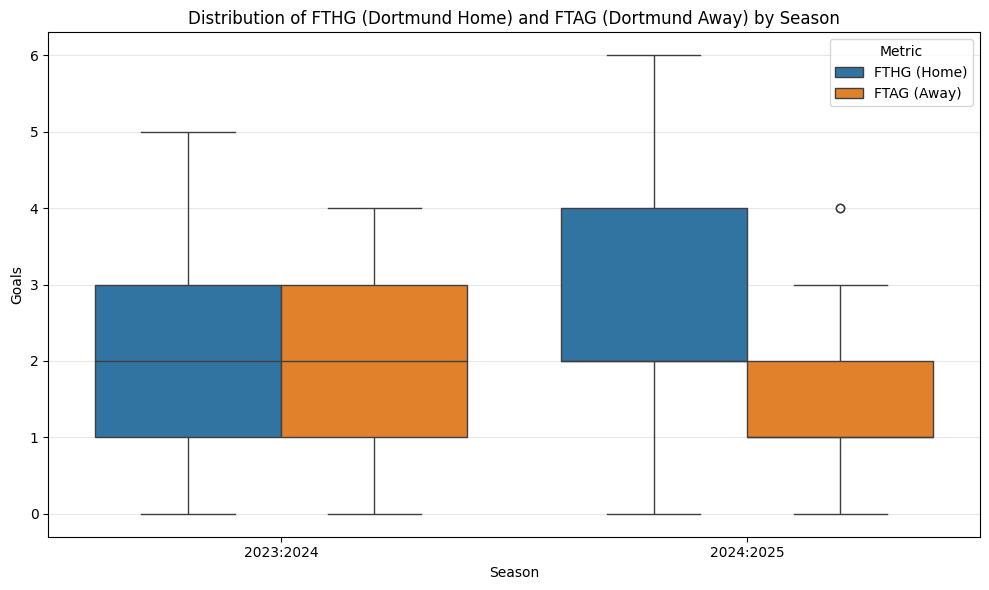

In [10]:
# Calculate variance for FTHG (Dortmund Home) and FTAG (Dortmund Away) per season
results = []

for season in merged_df['Season'].unique():
    season_data = merged_df[merged_df['Season'] == season]
    
    # Filter for Dortmund home matches
    dortmund_home = season_data[season_data['HomeTeam'] == 'Dortmund']
    
    # Filter for Dortmund away matches
    dortmund_away = season_data[season_data['AwayTeam'] == 'Dortmund']
    
    # Calculate means
    mean_fthg = dortmund_home['FTHG'].mean()
    mean_ftag = dortmund_away['FTAG'].mean()
    
    # Calculate variances
    var_fthg = dortmund_home['FTHG'].var()
    var_ftag = dortmund_away['FTAG'].var()
    
    # Calculate standard deviations (for reference)
    std_fthg = dortmund_home['FTHG'].std()
    std_ftag = dortmund_away['FTAG'].std()
    
    results.append({
        'Season': season,
        'Mean FTHG (Dortmund Home)': mean_fthg,
        'Mean FTAG (Dortmund Away)': mean_ftag,
        'Variance FTHG (Dortmund Home)': var_fthg,
        'Variance FTAG (Dortmund Away)': var_ftag,
        'Std Dev FTHG (Dortmund Home)': std_fthg,
        'Std Dev FTAG (Dortmund Away)': std_ftag
    })

results_df = pd.DataFrame(results)
print("Mean, Variance, and Standard Deviation for FTHG (Dortmund as Home) and FTAG (Dortmund as Away) per Season:")
display(results_df)

# Create a long-form DataFrame for box plotting FTHG and FTAG distributions per season
import seaborn as sns
import matplotlib.pyplot as plt

boxplot_data = []
for season in merged_df['Season'].unique():
    season_data = merged_df[merged_df['Season'] == season]

    # Dortmund home FTHG values
    dortmund_home = season_data[season_data['HomeTeam'] == 'Dortmund']
    for v in dortmund_home['FTHG'].dropna():
        boxplot_data.append({
            'Season': season,
            'Metric': 'FTHG (Home)',
            'Value': v
        })

    # Dortmund away FTAG values
    dortmund_away = season_data[season_data['AwayTeam'] == 'Dortmund']
    for v in dortmund_away['FTAG'].dropna():
        boxplot_data.append({
            'Season': season,
            'Metric': 'FTAG (Away)',
            'Value': v
        })

boxplot_df = pd.DataFrame(boxplot_data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_df, x='Season', y='Value', hue='Metric')
plt.title('Distribution of FTHG (Dortmund Home) and FTAG (Dortmund Away) by Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.legend(title='Metric')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
# Dispersion statistics (by season) for FTHG (Dortmund Home) and FTAG (Dortmund Away)
# - IQR: robust spread (Q3 - Q1)
# - CV: coefficient of variation (Std / Mean)
# - Dispersion Ratio: Pearson Chi-square / residual df (Poisson-style), i.e.
#   sum((y - mu)^2 / mu) / (n - 1)

import numpy as np
import pandas as pd


def dispersion_stats(series: pd.Series) -> dict:
    s = pd.to_numeric(series, errors='coerce').dropna()

    if s.empty:
        return {
            'N': 0,
            'Mean': np.nan,
            'Std': np.nan,
            'Variance': np.nan,
            'IQR': np.nan,
            'CV (Std/Mean)': np.nan,
            'Pearson Chi-square': np.nan,
            'Residual df': np.nan,
            'Dispersion Ratio': np.nan,
        }

    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    mean = float(s.mean())
    std = float(s.std())
    var = float(s.var())
    n = int(s.shape[0])
    df_resid = n - 1  # one parameter (mu) estimated

    # Pearson Chi-square for Poisson-style dispersion (using constant mu=mean)
    if mean > 0:
        pearson_chi2 = float((((s - mean) ** 2) / mean).sum())
        dispersion_ratio = float(pearson_chi2 / df_resid) if df_resid > 0 else np.nan
    else:
        pearson_chi2 = np.nan
        dispersion_ratio = np.nan

    return {
        'N': n,
        'Mean': mean,
        'Std': std,
        'Variance': var,
        'IQR': float(q3 - q1),
        'CV (Std/Mean)': float(std / mean) if mean != 0 else np.nan,
        'Pearson Chi-square': pearson_chi2,
        'Residual df': df_resid if df_resid > 0 else np.nan,
        'Dispersion Ratio': dispersion_ratio,
    }


disp_rows = []
for season in sorted(merged_df['Season'].dropna().unique()):
    season_data = merged_df[merged_df['Season'] == season]

    fthg_home = season_data.loc[season_data['HomeTeam'] == 'Dortmund', 'FTHG']
    ftag_away = season_data.loc[season_data['AwayTeam'] == 'Dortmund', 'FTAG']

    row_fthg = {'Season': season, 'Metric': 'FTHG (Dortmund Home)'}
    row_fthg.update(dispersion_stats(fthg_home))

    row_ftag = {'Season': season, 'Metric': 'FTAG (Dortmund Away)'}
    row_ftag.update(dispersion_stats(ftag_away))

    disp_rows.extend([row_fthg, row_ftag])

dispersion_df = pd.DataFrame(disp_rows)
print('Dispersion statistics (IQR + CV + Dispersion Ratio) by season:')
display(dispersion_df)


Dispersion statistics (IQR + CV + Dispersion Ratio) by season:


,Season,Metric,N,Mean,Std,Variance,IQR,CV (Std/Mean),Pearson Chi-square,Residual df,Dispersion Ratio
0,2023:2024,FTHG (Dortmund Home),17,2.176471,1.509772,2.279412,2.0,0.693679,16.756757,16,1.047297
1,2023:2024,FTAG (Dortmund Away),17,1.823529,1.236694,1.529412,2.0,0.678187,13.419355,16,0.838710
2,2024:2025,FTHG (Dortmund Home),17,2.588235,1.502449,2.257353,2.0,0.580492,13.954545,16,0.872159
3,2024:2025,FTAG (Dortmund Away),17,1.588235,1.325652,1.757353,1.0,0.834670,17.703704,16,1.106481


# Feature Engineering: Adding Minimum Context Variables


**Method B: Within-Season Static Tags**

Note: For this sprint, this method is acceptable (and preferred). It technically uses future matches within the season, true. But, this sprint is not about beating the market by 0.5%, perfect causal purity or real-time deployment

It is about testing structural disagreement, using coarse, stable labels and seeing whether the market prices matchups as simply as one suspects. 

---

Markets themselves:

- Form season priors quickly

- Update aggressively after ~5–8 rounds

- Effectively behave as if these season-level identities exist

So the static tags are acting as:

"This is how this team is generally perceived this season"


**Adding an Opponent-Style Proxy**


In [12]:
# ============================
# Feature Engineering: Shots-based possession proxy (season-specific)
# Input required columns: Season, HomeTeam, AwayTeam, HS, AS
# Output columns added to match-level dataset: HomeLowPossession, AwayLowPossession
# ============================

import pandas as pd

required_cols = {'Season', 'HomeTeam', 'AwayTeam', 'HS', 'AS'}
missing_cols = required_cols - set(merged_df.columns)
if missing_cols:
    raise ValueError(f"merged_df is missing required columns: {sorted(missing_cols)}")

# 1) Team–season aggregation table (use ONLY HS/AS; no match-specific info beyond that)
home_rows = merged_df[['Season', 'HomeTeam', 'HS', 'AS']].rename(columns={
    'HomeTeam': 'Team',
    'HS': 'ShotsFor',
    'AS': 'ShotsAgainst'
})

away_rows = merged_df[['Season', 'AwayTeam', 'HS', 'AS']].rename(columns={
    'AwayTeam': 'Team',
    'AS': 'ShotsFor',
    'HS': 'ShotsAgainst'
})

team_match_rows = pd.concat([home_rows, away_rows], ignore_index=True)
team_season_agg = (
    team_match_rows
    .groupby(['Season', 'Team'], as_index=False)
    .agg(
        AverageShotsFor=('ShotsFor', 'mean'),
        AverageShotsAgainst=('ShotsAgainst', 'mean'),
    )
)

# 2) Possession proxy label (bottom 6 by AverageShotsFor within each season)
team_season_agg['LowPossession'] = 0
for season, grp in team_season_agg.groupby('Season'):
    bottom6_teams = grp.nsmallest(6, 'AverageShotsFor')['Team']
    team_season_agg.loc[
        (team_season_agg['Season'] == season) & (team_season_agg['Team'].isin(bottom6_teams)),
        'LowPossession'
    ] = 1

# 3) Join back to match-level dataset
home_lp = team_season_agg[['Season', 'Team', 'LowPossession']].rename(columns={
    'Team': 'HomeTeam',
    'LowPossession': 'HomeLowPossession'
})

aaway_lp = team_season_agg[['Season', 'Team', 'LowPossession']].rename(columns={
    'Team': 'AwayTeam',
    'LowPossession': 'AwayLowPossession'
})

merged_df = merged_df.merge(home_lp, on=['Season', 'HomeTeam'], how='left')
merged_df = merged_df.merge(aaway_lp, on=['Season', 'AwayTeam'], how='left')

# 4) Output: updated match-level dataset with new columns
print('Updated match-level dataset preview (with HomeLowPossession/AwayLowPossession):')
display(merged_df[['Season', 'HomeTeam', 'AwayTeam', 'HS', 'AS', 'HomeLowPossession', 'AwayLowPossession']].head())

# (Optional) also show the team-season table
print('\nTeam–season aggregation (AverageShotsFor/AverageShotsAgainst + LowPossession):')
display(team_season_agg.sort_values(['Season', 'AverageShotsFor'], ascending=[True, True]).head(20))


Updated match-level dataset preview (with HomeLowPossession/AwayLowPossession):


,Season,HomeTeam,AwayTeam,HS,AS,HomeLowPossession,AwayLowPossession
0,2023:2024,Werder Bremen,Bayern Munich,6.0,25.0,1,0
1,2023:2024,Augsburg,M'gladbach,20.0,9.0,0,0
2,2023:2024,Hoffenheim,Freiburg,24.0,17.0,0,1
3,2023:2024,Leverkusen,RB Leipzig,11.0,13.0,0,0
4,2023:2024,Stuttgart,Bochum,19.0,4.0,0,0



Team–season aggregation (AverageShotsFor/AverageShotsAgainst + LowPossession):


,Season,Team,AverageShotsFor,AverageShotsAgainst,LowPossession
8,2023:2024,Heidenheim,11.352941,14.764706,1
5,2023:2024,Ein Frankfurt,11.558824,12.264706,1
7,2023:2024,Freiburg,11.617647,15.000000,1
16,2023:2024,Werder Bremen,11.735294,15.176471,1
3,2023:2024,Darmstadt,11.823529,16.294118,1
15,2023:2024,Union Berlin,11.882353,13.852941,1
17,2023:2024,Wolfsburg,11.970588,12.470588,0
6,2023:2024,FC Koln,12.558824,14.705882,0
0,2023:2024,Augsburg,12.735294,14.941176,0
11,2023:2024,M'gladbach,13.088235,16.558824,0


## Sanity Checks


**Count per Season**


In [13]:
# For each season, check that exactly 6 teams are flagged as LowPossession
lp_count_per_season = team_season_agg.groupby('Season')['LowPossession'].sum().reset_index()
print('\nLowPossession team count per season:')
display(lp_count_per_season)

# Assert for error if any season doesn't have exactly 6 flagged teams
assert all(lp_count_per_season['LowPossession'] == 6), "ERROR: Some season(s) do not have exactly 6 teams flagged as LowPossession."



LowPossession team count per season:


,Season,LowPossession
0,2023:2024,6
1,2024:2025,6


**No Missing Joins**


In [14]:
# Check that no missing joins occurred: HomeLowPossession and AwayLowPossession have no nulls
assert merged_df['HomeLowPossession'].isnull().sum() == 0, "ERROR: Null values found in HomeLowPossession after merge!"
assert merged_df['AwayLowPossession'].isnull().sum() == 0, "ERROR: Null values found in AwayLowPossession after merge!"
print("No missing joins: HomeLowPossession and AwayLowPossession columns have no nulls.")


No missing joins: HomeLowPossession and AwayLowPossession columns have no nulls.


## Poisson regression models for Full Time Home Goals (FTHG)

Fitting two Poisson regression models on Bundesliga match-level data for seasons 2023/2024 and 2024/2025:
- **Model A (baseline)**: `FTHG ~ HomeTeam` (HomeTeam as categorical fixed effect). 
    - Does this structural variable matter in general? This is fitting a league-level generative model.
- **Model B (with possession proxy)**: `FTHG ~ HomeTeam + AwayLowPossession` (HomeTeam as categorical fixed effect, AwayLowPossession as binary regressor)

Both models are fit on the pooled data from the two seasons only, and the output is limited to coefficient tables (coefficients and standard errors), log-likelihood, and AIC.


In [15]:
%pip install statsmodels



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Use only the requested seasons (2023/2024 and 2024/2025)
model_df = merged_df[merged_df["Season"].isin(["2023:2024", "2024:2025"])].copy()

# Ensure required columns are present
required_cols = {"Season", "HomeTeam", "FTHG", "AwayLowPossession"}
missing = required_cols - set(model_df.columns)
if missing:
    raise ValueError(f"Missing required columns for modeling: {sorted(missing)}")

# -----------------------------
# 1. Model A: FTHG ~ C(HomeTeam)
# -----------------------------
model_a = smf.glm(
    formula="FTHG ~ C(HomeTeam)",
    data=model_df,
    family=sm.families.Poisson(),
).fit()

coef_table_a = (
    pd.DataFrame({
        "coef": model_a.params,
        "std_err": model_a.bse,
    })
)

print("Model A: Poisson regression, FTHG ~ C(HomeTeam) (seasons 2023/2024 & 2024/2025)")
display(coef_table_a)
print(f"Log-likelihood: {model_a.llf:.3f}")
print(f"AIC: {model_a.aic:.3f}")

# ---------------------------------------------
# 2. Model B: FTHG ~ C(HomeTeam) + AwayLowPossession
# ---------------------------------------------
model_b = smf.glm(
    formula="FTHG ~ C(HomeTeam) + AwayLowPossession",
    data=model_df,
    family=sm.families.Poisson(),
).fit()

coef_table_b = (
    pd.DataFrame({
        "coef": model_b.params,
        "std_err": model_b.bse,
    })
)

print("\nModel B: Poisson regression, FTHG ~ C(HomeTeam) + AwayLowPossession (seasons 2023/2024 & 2024/2025)")
display(coef_table_b)
print(f"Log-likelihood: {model_b.llf:.3f}")
print(f"AIC: {model_b.aic:.3f}")


Model A: Poisson regression, FTHG ~ C(HomeTeam) (seasons 2023/2024 & 2024/2025)


,coef,std_err
Intercept,0.257829,0.150756
C(HomeTeam)[T.Bayern Munich],0.879249,0.179336
C(HomeTeam)[T.Bochum],-0.046520,0.215724
C(HomeTeam)[T.Darmstadt],-0.382992,0.298988
C(HomeTeam)[T.Dortmund],0.610260,0.187278
C(HomeTeam)[T.Ein Frankfurt],0.464306,0.192388
C(HomeTeam)[T.FC Koln],-0.382992,0.298988
C(HomeTeam)[T.Freiburg],0.310155,0.198479
C(HomeTeam)[T.Heidenheim],-0.022990,0.214437
C(HomeTeam)[T.Hoffenheim],0.241162,0.201456


Log-likelihood: -964.209
AIC: 1968.419

Model B: Poisson regression, FTHG ~ C(HomeTeam) + AwayLowPossession (seasons 2023/2024 & 2024/2025)


,coef,std_err
Intercept,0.248374,0.152272
C(HomeTeam)[T.Bayern Munich],0.878394,0.179346
C(HomeTeam)[T.Bochum],-0.047375,0.215733
C(HomeTeam)[T.Darmstadt],-0.382136,0.298994
C(HomeTeam)[T.Dortmund],0.609404,0.187288
C(HomeTeam)[T.Ein Frankfurt],0.464306,0.192388
C(HomeTeam)[T.FC Koln],-0.383847,0.298994
C(HomeTeam)[T.Freiburg],0.311011,0.198488
C(HomeTeam)[T.Heidenheim],-0.022134,0.214445
C(HomeTeam)[T.Hoffenheim],0.240307,0.201465


Log-likelihood: -964.111
AIC: 1970.221


## Predict Expected Home Goals for 2025/2026 Season

This section loads the 2025/2026 Bundesliga fixtures, computes the `AwayLowPossession` feature using carry-forward from the 2024/2025 season, and uses Model B to predict expected home goals (λ) for each upcoming match.


In [17]:
# Load 2025/2026 fixtures
from pathlib import Path

project_root = Path().resolve()
data_path_2025_2026 = project_root / "Data" / "2025:2026.csv"

upcoming_df = pd.read_csv(data_path_2025_2026)

# Select required columns: Date, HomeTeam, AwayTeam
upcoming_df = upcoming_df[['Date', 'HomeTeam', 'AwayTeam']].copy()

print(f"Loaded {len(upcoming_df)} fixtures for 2025/2026 season")
display(upcoming_df.head())


Loaded 170 fixtures for 2025/2026 season


,Date,HomeTeam,AwayTeam
0,22/08/2025,Bayern Munich,RB Leipzig
1,23/08/2025,Ein Frankfurt,Werder Bremen
2,23/08/2025,Freiburg,Augsburg
3,23/08/2025,Heidenheim,Wolfsburg
4,23/08/2025,Leverkusen,Hoffenheim


In [18]:
# Compute AwayLowPossession using carry-forward from 2024/2025 season

# Check that team_season_agg exists (from feature engineering section)
if 'team_season_agg' not in globals():
    raise NameError("`team_season_agg` not found. Run the cell that builds the team–season table first (Cell 30).")

# 1. Extract LowPossession labels from 2024/2025 season
prev_season_mask = team_season_agg['Season'] == '2024:2025'
prev_season_lp = team_season_agg.loc[prev_season_mask, ['Team', 'LowPossession']].rename(
    columns={'LowPossession': 'LowPossession_25_26'}
)

# 2. Get all teams appearing in 2025/2026 fixtures (home or away)
teams_25_26 = pd.Index(sorted(set(upcoming_df['HomeTeam']) | set(upcoming_df['AwayTeam'])))

# 3. Create lookup table: start from all 25/26 teams and left-join their 24/25 LowPossession label
lookup_25_26 = (
    pd.DataFrame({'Team': teams_25_26})
    .merge(prev_season_lp, on='Team', how='left')
)

# 4. For teams not present in 2024/2025 (promoted teams), set LowPossession_25_26 = 1
lookup_25_26['LowPossession_25_26'] = lookup_25_26['LowPossession_25_26'].fillna(1).astype(int)

# 5. Join the lookup into upcoming fixtures to create AwayLowPossession
upcoming_df = upcoming_df.merge(
    lookup_25_26[['Team', 'LowPossession_25_26']],
    left_on='AwayTeam',
    right_on='Team',
    how='left'
)

upcoming_df = upcoming_df.drop(columns=['Team'])
upcoming_df = upcoming_df.rename(columns={'LowPossession_25_26': 'AwayLowPossession'})

# Verify the column was added
print(f"AwayLowPossession computed. Summary:")
print(f"  - Total fixtures: {len(upcoming_df)}")
print(f"  - AwayLowPossession = 1: {upcoming_df['AwayLowPossession'].sum()}")
print(f"  - AwayLowPossession = 0: {(upcoming_df['AwayLowPossession'] == 0).sum()}")
display(upcoming_df[['Date', 'HomeTeam', 'AwayTeam', 'AwayLowPossession']].head())


AwayLowPossession computed. Summary:
  - Total fixtures: 170
  - AwayLowPossession = 1: 66
  - AwayLowPossession = 0: 104


,Date,HomeTeam,AwayTeam,AwayLowPossession
0,22/08/2025,Bayern Munich,RB Leipzig,0
1,23/08/2025,Ein Frankfurt,Werder Bremen,0
2,23/08/2025,Freiburg,Augsburg,1
3,23/08/2025,Heidenheim,Wolfsburg,0
4,23/08/2025,Leverkusen,Hoffenheim,0


In [19]:
# Predict expected home goals (lambda_FTHG) using Model B

# Check that model_b and model_df exist (from Model B fitting section)
if 'model_b' not in globals():
    raise NameError("`model_b` not found. Run the cell that fits Model B (Poisson regression) first (Cell 38).")
if 'model_df' not in globals():
    raise NameError("`model_df` not found. Run the cell that fits Model B (Poisson regression) first (Cell 38).")

# Ensure required predictors for Model B are present
required_model_cols = {"HomeTeam", "AwayLowPossession"}
missing_model_cols = required_model_cols - set(upcoming_df.columns)
if missing_model_cols:
    raise ValueError(f"upcoming_df is missing required model columns: {sorted(missing_model_cols)}")

# 1) Filter to only fixtures where HomeTeam was seen in the training data
train_home_teams = model_df['HomeTeam'].unique()
mask_known = upcoming_df['HomeTeam'].isin(train_home_teams)

known_upcoming = upcoming_df.loc[mask_known].copy()
promoted_upcoming = upcoming_df.loc[~mask_known].copy()

print(f"Total fixtures: {len(upcoming_df)}")
print(f"  - Known HomeTeams (can predict): {len(known_upcoming)}")
print(f"  - Promoted HomeTeams (cannot predict): {len(promoted_upcoming)}")

if len(promoted_upcoming) > 0:
    promoted_teams = promoted_upcoming['HomeTeam'].unique()
    print(f"  - Promoted teams: {', '.join(sorted(promoted_teams))}")

# 2) Predict lambda_FTHG only for known teams
upcoming_df = upcoming_df.copy()
upcoming_df["lambda_FTHG"] = None  # Initialize with None

if len(known_upcoming) > 0:
    known_upcoming["lambda_FTHG"] = model_b.predict(known_upcoming)
    # Update the main dataframe with predictions for known teams
    upcoming_df.loc[mask_known, "lambda_FTHG"] = known_upcoming["lambda_FTHG"].values

# 3) Handle promoted teams separately (set to NaN or use a default)
# For now, we'll leave them as None/NaN to indicate they cannot be predicted
if len(promoted_upcoming) > 0:
    print(f"\nNote: Promoted teams cannot be predicted by Model B (no training data).")
    print(f"      Their lambda_FTHG values are set to NaN.")

print(f"\nPredicted lambda_FTHG for {len(known_upcoming)} fixtures (known teams only)")
if len(known_upcoming) > 0:
    print(f"  - Mean lambda_FTHG: {known_upcoming['lambda_FTHG'].mean():.3f}")
    print(f"  - Min lambda_FTHG: {known_upcoming['lambda_FTHG'].min():.3f}")
    print(f"  - Max lambda_FTHG: {known_upcoming['lambda_FTHG'].max():.3f}")


Total fixtures: 170
  - Known HomeTeams (can predict): 161
  - Promoted HomeTeams (cannot predict): 9
  - Promoted teams: Hamburg

Note: Promoted teams cannot be predicted by Model B (no training data).
      Their lambda_FTHG values are set to NaN.

Predicted lambda_FTHG for 161 fixtures (known teams only)
  - Mean lambda_FTHG: 1.727
  - Min lambda_FTHG: 0.583
  - Max lambda_FTHG: 3.176


In [20]:
# Compute over-line probabilities and display final results

from scipy.stats import poisson
import numpy as np

# Verify lambda_FTHG exists
if 'lambda_FTHG' not in upcoming_df.columns:
    raise ValueError("lambda_FTHG column not found. Run the prediction cell first.")

# Compute over-line probabilities for matches with valid lambda_FTHG
# P_over_0_5 = P(FTHG ≥ 1) = 1 - P(FTHG ≤ 0)
# P_over_1_5 = P(FTHG ≥ 2) = 1 - P(FTHG ≤ 1)
# P_over_2_5 = P(FTHG ≥ 3) = 1 - P(FTHG ≤ 2)
# P_over_3_5 = P(FTHG ≥ 4) = 1 - P(FTHG ≤ 3)

upcoming_df = upcoming_df.copy()

# Initialize probability columns with NaN
upcoming_df["P_over_0_5"] = np.nan
upcoming_df["P_over_1_5"] = np.nan
upcoming_df["P_over_2_5"] = np.nan
upcoming_df["P_over_3_5"] = np.nan

# Compute probabilities only for rows with valid lambda_FTHG
mask_valid = upcoming_df['lambda_FTHG'].notna()
if mask_valid.sum() > 0:
    # Convert to numeric array to avoid dtype issues
    mu = pd.to_numeric(upcoming_df.loc[mask_valid, "lambda_FTHG"], errors='coerce')
    # Filter out any NaN that might have been introduced
    mu_valid = mu.dropna()
    valid_indices = mu_valid.index
    
    if len(mu_valid) > 0:
        # Convert to numpy array for scipy compatibility
        mu_array = mu_valid.values.astype(float)
        
        # Compute probabilities
        upcoming_df.loc[valid_indices, "P_over_0_5"] = 1 - poisson.cdf(0, mu=mu_array)
        upcoming_df.loc[valid_indices, "P_over_1_5"] = 1 - poisson.cdf(1, mu=mu_array)
        upcoming_df.loc[valid_indices, "P_over_2_5"] = 1 - poisson.cdf(2, mu=mu_array)
        upcoming_df.loc[valid_indices, "P_over_3_5"] = 1 - poisson.cdf(3, mu=mu_array)

# Select output columns
output_cols = [
    'Date',
    'HomeTeam',
    'AwayTeam',
    'lambda_FTHG',
    'P_over_0_5',
    'P_over_1_5',
    'P_over_2_5',
    'P_over_3_5',
]

# Verify all columns exist
missing_cols = set(output_cols) - set(upcoming_df.columns)
if missing_cols:
    raise ValueError(f"Missing required columns: {sorted(missing_cols)}")

# Create output DataFrame and sort by Date
output_df = upcoming_df[output_cols].copy()
output_df = output_df.sort_values('Date').reset_index(drop=True)

# Count predictions vs missing values
predicted_count = output_df['lambda_FTHG'].notna().sum()
missing_count = output_df['lambda_FTHG'].isna().sum()

print("Expected Home Goals (lambda_FTHG) and Over-Line Probabilities for 2025/2026 Bundesliga Fixtures:")
print("=" * 80)
print(f"Total fixtures: {len(output_df)}")
print(f"  - With predictions (known HomeTeams): {predicted_count}")
print(f"  - Missing predictions (promoted HomeTeams): {missing_count}")
print()
print("Columns:")
print("  - lambda_FTHG: Expected home goals (λ)")
print("  - P_over_0_5: P(FTHG ≥ 1)")
print("  - P_over_1_5: P(FTHG ≥ 2)")
print("  - P_over_2_5: P(FTHG ≥ 3)")
print("  - P_over_3_5: P(FTHG ≥ 4)")
print()

display(output_df)


Expected Home Goals (lambda_FTHG) and Over-Line Probabilities for 2025/2026 Bundesliga Fixtures:
Total fixtures: 170
  - With predictions (known HomeTeams): 161
  - Missing predictions (promoted HomeTeams): 9

Columns:
  - lambda_FTHG: Expected home goals (λ)
  - P_over_0_5: P(FTHG ≥ 1)
  - P_over_1_5: P(FTHG ≥ 2)
  - P_over_2_5: P(FTHG ≥ 3)
  - P_over_3_5: P(FTHG ≥ 4)



,Date,HomeTeam,AwayTeam,lambda_FTHG,P_over_0_5,P_over_1_5,P_over_2_5,P_over_3_5
0,01/11/2025,Heidenheim,Ein Frankfurt,1.253878,0.714604,0.356752,0.132401,0.038632
1,01/11/2025,Bayern Munich,Leverkusen,3.08567,0.954301,0.813287,0.595727,0.371954
2,01/11/2025,Union Berlin,Freiburg,1.200645,0.699000,0.337606,0.120653,0.033825
3,01/11/2025,St Pauli,M'gladbach,0.583199,0.441890,0.116401,0.021488,0.003037
4,01/11/2025,RB Leipzig,Stuttgart,2.125037,0.880571,0.626781,0.357125,0.166115
...,...,...,...,...,...,...,...,...
165,30/11/2025,Hamburg,Stuttgart,None,NaN,NaN,NaN,NaN
166,31/08/2025,Dortmund,Union Berlin,2.427151,0.911712,0.697424,0.437369,0.226971
167,31/08/2025,FC Koln,Freiburg,0.898945,0.593001,0.227132,0.062683,0.013407
168,31/08/2025,Wolfsburg,Mainz,1.513725,0.779911,0.446758,0.194606,0.067377


## Model vs Market: Delta Table for Over 2.5 Goals

This section compares the model's ex-ante Over 2.5 goals probability (`P_over_2_5`) with margin-adjusted market probabilities derived from Betbrain average odds.

**Key points:**
- We use pre-match Betbrain odds (average across bookmakers)
- Realized goals (FTHG, FTAG) are **NOT** used in probability calculations
- Market probabilities are margin-adjusted to remove bookmaker overround
- The delta metric shows where the model disagrees with the market


In [ ]:
# Load Betbrain odds and merge with model predictions

from pathlib import Path
import pandas as pd

# Load 2025/2026 data to get Betbrain odds
project_root = Path().resolve()
data_path_2025_2026 = project_root / "Data" / "2025:2026.csv"

odds_df = pd.read_csv(data_path_2025_2026)

# Extract required columns: Date, HomeTeam, AwayTeam, and Betbrain average odds
# Note: In football-data.co.uk format, "Avg>2.5" and "Avg<2.5" represent Betbrain average odds
odds_cols = ['Date', 'HomeTeam', 'AwayTeam', 'Avg>2.5', 'Avg<2.5']
missing_odds_cols = set(odds_cols) - set(odds_df.columns)

if missing_odds_cols:
    # Try alternative column names
    if 'BbAv>2.5' in odds_df.columns and 'BbAv<2.5' in odds_df.columns:
        odds_cols = ['Date', 'HomeTeam', 'AwayTeam', 'BbAv>2.5', 'BbAv<2.5']
    else:
        raise ValueError(f"Missing required odds columns: {sorted(missing_odds_cols)}. Available columns: {[c for c in odds_df.columns if '2.5' in c]}")

odds_subset = odds_df[odds_cols].copy()

# Check that upcoming_df exists and has the required model predictions
if 'upcoming_df' not in globals():
    raise NameError("`upcoming_df` not found. Run the prediction cells first.")

# Merge odds with model predictions
# Use Date, HomeTeam, AwayTeam as merge keys
delta_df = upcoming_df.merge(
    odds_subset,
    on=['Date', 'HomeTeam', 'AwayTeam'],
    how='inner'
)

print(f"Merged {len(delta_df)} matches with both model predictions and Betbrain odds")
print(f"  - Matches with valid lambda_FTHG: {delta_df['lambda_FTHG'].notna().sum()}")
print(f"  - Matches with valid P_over_2_5: {delta_df['P_over_2_5'].notna().sum()}")

# Get the column names for odds (handles both naming conventions)
over_odds_col = 'BbAv>2.5' if 'BbAv>2.5' in delta_df.columns else 'Avg>2.5'
under_odds_col = 'BbAv<2.5' if 'BbAv<2.5' in delta_df.columns else 'Avg<2.5'

print(f"  - Matches with valid {over_odds_col}: {delta_df[over_odds_col].notna().sum()}")
print(f"  - Matches with valid {under_odds_col}: {delta_df[under_odds_col].notna().sum()}")

display(delta_df[['Date', 'HomeTeam', 'AwayTeam', 'lambda_FTHG', 'P_over_2_5', over_odds_col, under_odds_col]].head())


In [ ]:
# Compute margin-adjusted market probabilities from Betbrain odds

import numpy as np

# Get the column names for odds
over_odds_col = 'BbAv>2.5' if 'BbAv>2.5' in delta_df.columns else 'Avg>2.5'
under_odds_col = 'BbAv<2.5' if 'BbAv<2.5' in delta_df.columns else 'Avg<2.5'

# Convert odds to numeric, handling any non-numeric values
delta_df[over_odds_col] = pd.to_numeric(delta_df[over_odds_col], errors='coerce')
delta_df[under_odds_col] = pd.to_numeric(delta_df[under_odds_col], errors='coerce')

# Compute raw implied probabilities
# p_over_raw = 1 / odds_over
# p_under_raw = 1 / odds_under
delta_df['p_over_raw'] = 1.0 / delta_df[over_odds_col]
delta_df['p_under_raw'] = 1.0 / delta_df[under_odds_col]

# Compute overround: R = p_over_raw + p_under_raw
# The overround represents the bookmaker's margin
delta_df['overround'] = delta_df['p_over_raw'] + delta_df['p_under_raw']

# Compute margin-adjusted probabilities
# P_market_over_2_5 = p_over_raw / R
# This normalizes the probabilities to sum to 1, removing the bookmaker margin
delta_df['P_market_over_2_5'] = delta_df['p_over_raw'] / delta_df['overround']

# Ensure probabilities are bounded [0, 1]
delta_df['P_market_over_2_5'] = delta_df['P_market_over_2_5'].clip(0, 1)

# Handle edge cases:
# - Invalid odds (≤ 1.0) would give probabilities > 1, already handled by clip
# - Division by zero (if overround is 0 or NaN)
delta_df.loc[delta_df['overround'] <= 0, 'P_market_over_2_5'] = np.nan
delta_df.loc[delta_df['overround'].isna(), 'P_market_over_2_5'] = np.nan

# Display summary statistics
print("Market Probability Computation Summary:")
print("=" * 80)
print(f"Total matches: {len(delta_df)}")
print(f"  - Valid odds (both over and under): {delta_df[[over_odds_col, under_odds_col]].notna().all(axis=1).sum()}")
print(f"  - Valid P_market_over_2_5: {delta_df['P_market_over_2_5'].notna().sum()}")
print(f"\nOverround statistics:")
print(f"  - Mean overround: {delta_df['overround'].mean():.4f}")
print(f"  - Min overround: {delta_df['overround'].min():.4f}")
print(f"  - Max overround: {delta_df['overround'].max():.4f}")
print(f"\nMarket probability statistics:")
print(f"  - Mean P_market_over_2_5: {delta_df['P_market_over_2_5'].mean():.4f}")
print(f"  - Min P_market_over_2_5: {delta_df['P_market_over_2_5'].min():.4f}")
print(f"  - Max P_market_over_2_5: {delta_df['P_market_over_2_5'].max():.4f}")

display(delta_df[['Date', 'HomeTeam', 'AwayTeam', over_odds_col, under_odds_col, 'overround', 'P_market_over_2_5']].head())


In [ ]:
# Compute delta metric and build output table

# Compute delta: model probability - market probability
delta_df['delta_over_2_5'] = delta_df['P_over_2_5'] - delta_df['P_market_over_2_5']

# Filter to only rows with valid predictions and odds
# We need both model predictions and market probabilities
valid_mask = (
    delta_df['lambda_FTHG'].notna() &
    delta_df['P_over_2_5'].notna() &
    delta_df['P_market_over_2_5'].notna()
)

delta_table = delta_df.loc[valid_mask].copy()

# Rename P_over_2_5 to P_model_over_2_5 for clarity
delta_table = delta_table.rename(columns={'P_over_2_5': 'P_model_over_2_5'})

# Create output DataFrame with requested columns
output_cols = [
    'Date',
    'HomeTeam',
    'AwayTeam',
    'lambda_FTHG',
    'P_model_over_2_5',
    'P_market_over_2_5',
    'delta_over_2_5',
]

# Select and reorder columns
delta_table = delta_table[output_cols].copy()

# Sort by Date
delta_table = delta_table.sort_values('Date').reset_index(drop=True)

print(f"Delta table created with {len(delta_table)} matches")
print(f"  - Matches with valid model and market probabilities: {len(delta_table)}")
print(f"  - Matches excluded (missing data): {len(delta_df) - len(delta_table)}")

display(delta_table.head(10))


In [ ]:
# Display full delta table and perform sanity checks

print("=" * 80)
print("DELTA TABLE: Model vs Market Probabilities for Over 2.5 Goals")
print("=" * 80)
print()

# Display the full table
display(delta_table)

print("\n" + "=" * 80)
print("SANITY CHECKS")
print("=" * 80)
print()

# 1. Verify probability ranges: P_model and P_market should be in [0, 1]
p_model_min = delta_table['P_model_over_2_5'].min()
p_model_max = delta_table['P_model_over_2_5'].max()
p_market_min = delta_table['P_market_over_2_5'].min()
p_market_max = delta_table['P_market_over_2_5'].max()

print("1. Probability Range Checks:")
print(f"   P_model_over_2_5: [{p_model_min:.4f}, {p_model_max:.4f}]")
if p_model_min < 0 or p_model_max > 1:
    print("   ⚠️  WARNING: P_model_over_2_5 is outside [0, 1] range!")
else:
    print("   ✓ P_model_over_2_5 is within [0, 1] range")

print(f"   P_market_over_2_5: [{p_market_min:.4f}, {p_market_max:.4f}]")
if p_market_min < 0 or p_market_max > 1:
    print("   ⚠️  WARNING: P_market_over_2_5 is outside [0, 1] range!")
else:
    print("   ✓ P_market_over_2_5 is within [0, 1] range")

# 2. Check delta range (typically [-1, 1])
delta_min = delta_table['delta_over_2_5'].min()
delta_max = delta_table['delta_over_2_5'].max()

print(f"\n2. Delta Range Check:")
print(f"   delta_over_2_5: [{delta_min:.4f}, {delta_max:.4f}]")
if delta_min < -1 or delta_max > 1:
    print("   ⚠️  WARNING: delta_over_2_5 is outside [-1, 1] range!")
else:
    print("   ✓ delta_over_2_5 is within [-1, 1] range")

# 3. Summary statistics
print(f"\n3. Summary Statistics:")
print(f"   Mean delta_over_2_5: {delta_table['delta_over_2_5'].mean():.4f}")
print(f"   Std dev delta_over_2_5: {delta_table['delta_over_2_5'].std():.4f}")
print(f"   Median delta_over_2_5: {delta_table['delta_over_2_5'].median():.4f}")

# 4. Count matches with positive/negative deltas
positive_delta = (delta_table['delta_over_2_5'] > 0).sum()
negative_delta = (delta_table['delta_over_2_5'] < 0).sum()
zero_delta = (delta_table['delta_over_2_5'] == 0).sum()

print(f"\n4. Delta Distribution:")
print(f"   Matches where model > market (positive delta): {positive_delta} ({100*positive_delta/len(delta_table):.1f}%)")
print(f"   Matches where model < market (negative delta): {negative_delta} ({100*negative_delta/len(delta_table):.1f}%)")
print(f"   Matches where model = market (zero delta): {zero_delta} ({100*zero_delta/len(delta_table):.1f}%)")

# 5. Expected goals summary
print(f"\n5. Expected Goals (λ) Summary:")
print(f"   Mean lambda_FTHG: {delta_table['lambda_FTHG'].mean():.4f}")
print(f"   Min lambda_FTHG: {delta_table['lambda_FTHG'].min():.4f}")
print(f"   Max lambda_FTHG: {delta_table['lambda_FTHG'].max():.4f}")

print("\n" + "=" * 80)
print("Delta table is ready for analysis.")
print("=" * 80)
